# Haberman (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignoring the warnings from seaborn
import warnings
warnings.filterwarnings("ignore")

#Setting the grid for plots
sns.set_style("whitegrid");


haberman = pd.read_csv("haberman.csv" , names = ["Age", "Op_Year", "axil_nodes_det", "Surv_status"])

In [2]:
haberman.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


We have the dataset of the cancer patients. Looking at the features, our objective is to find whether the patient will survive or not.

Describing the feature columns : 
* **Age**  - It is the age of the patient.
* **Op_Year** - It is the year in which operation is taken place.
* **axil_nodes_det** - Number of axil nodes detected. 
* **Class attribute Surv_status** - If 1, then the patient survives for 5 years or longer and if 2, then the patient does not survive for 5 years.

In [3]:
haberman.shape

(306, 4)

In [4]:
haberman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

This is an unbalanced dataset. For 306 results, 225 patients have a status of 1 and only 81 patients have a status 2.

In [5]:
features = ['Age' , 'Op_Year' , 'axil_nodes_det']

# Univariate Analysis 

# Kernel Density Estimation

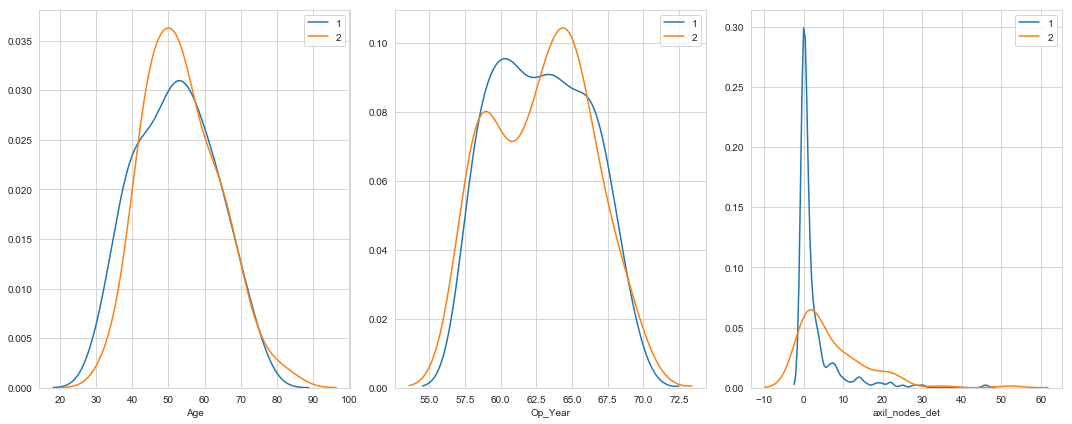

In [6]:
def kde(features):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    for i,colm in enumerate(features):
        sns.FacetGrid(haberman , hue = "Surv_status" , size = 3).map(sns.distplot,colm,hist = False,ax=ax[i]).add_legend()
        plt.close()
    fig.tight_layout()
kde(features)        

We have the smooth PDF curves using the kernel densities. For feature Age and Op_Year , the kernal densities for status 1 and status 2 are almost similar. Hence we cannot conclude anything from KDE for these two features. Looking at axil_nodes_det feature, the probabilities between two status has a huge difference. Status 1 reaches to 0.30 intensively and decreases intensively in the range near 0. **Hence we can conclude that if the number of axil nodes detected is around 0, the patient has a greater chance to have a status 1 i.e he will survive for 5 years or longer.**

# PDF and CDF

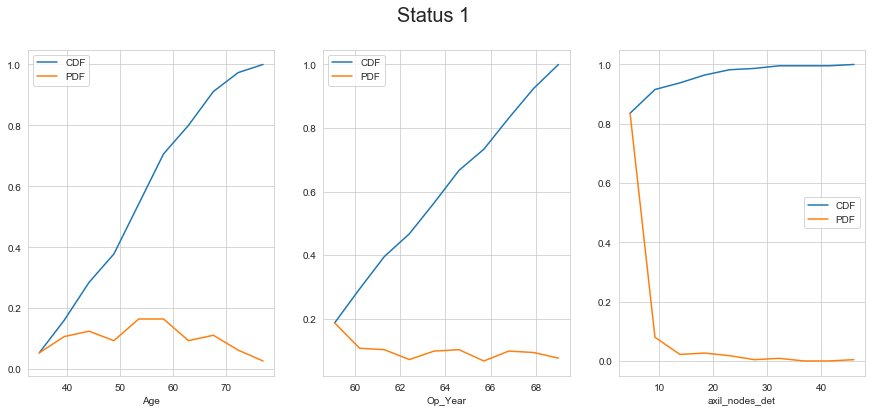

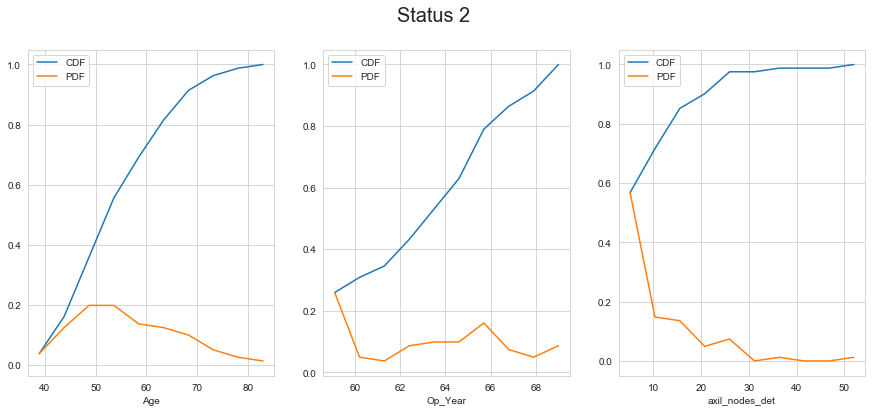

In [7]:
def Cdf_pdf():
    haberman_stat1 = haberman.loc[haberman["Surv_status"] == 1]
    haberman_stat2 = haberman.loc[haberman["Surv_status"] == 2]
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    fig.suptitle('Status 1' , fontsize = 20)
    for i,colm in enumerate(features):
        counts , bin_edges = np.histogram( haberman_stat1[colm] , bins = 10, density = False )
        pdf = counts / sum(counts)
        cdf = np.cumsum(pdf)
        ax[i].plot(bin_edges[1:],cdf, label='CDF')
        ax[i].plot(bin_edges[1:], pdf, label='PDF' )
        ax[i].set(xlabel=colm)
        ax[i].legend()
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    fig.suptitle('Status 2' , fontsize = 20)
    for i,colm in enumerate(features):
        counts , bin_edges = np.histogram( haberman_stat2[colm] , bins = 10, density = False )
        pdf = counts / sum(counts)
        cdf = np.cumsum(pdf)
        ax[i].plot(bin_edges[1:],cdf, label='CDF')
        ax[i].plot(bin_edges[1:], pdf, label='PDF' )
        ax[i].set(xlabel=colm)
        ax[i].legend()

Cdf_pdf()
    

 

   

Visualising the probability and cumulative density functions for both the Status of the patient, we cannot come to any concrete conclusion about the possibilities. Even though the operation years increases, there has been no medical improvement as the pdf shows no improvement in status 1.

# Box Plot

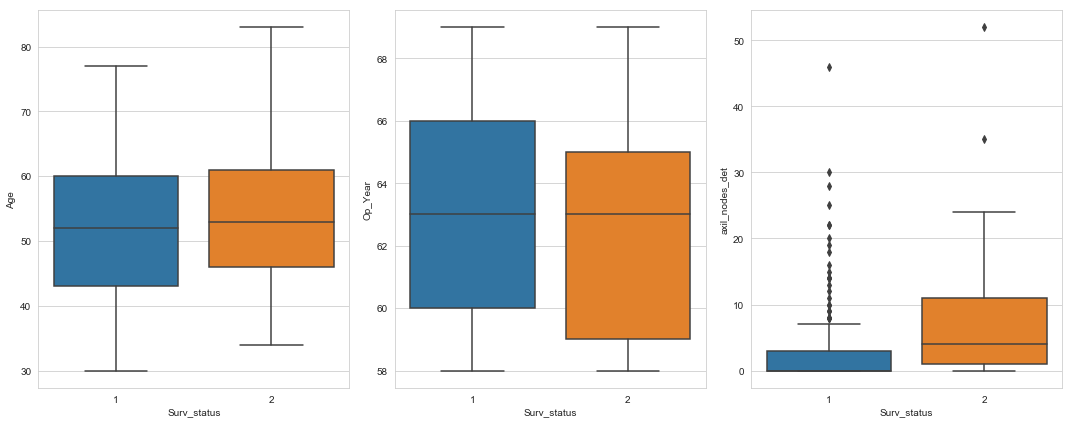

In [8]:
def boxplot(features):
    fig,ax = plt.subplots(1,3,figsize=(15,6))
    for i,colm in enumerate(features):
        sns.boxplot(x='Surv_status',y=colm, data= haberman, ax=ax[i])
    fig.tight_layout()
boxplot(features)
   

We find no conclusion using the box plots for features Age and Op_year. We can see plenty of outliers in the Status 1 box plot for feature axil_node_det . The 75th percentile of Status 2 is above the maximum for the Status 1(excluding the outliers). Hence we can make a conclusion that, **if the number of detected axil nodes is above 7 and below 25, the patient has a greater chance of having a Status 2.**

# Swarm Plot

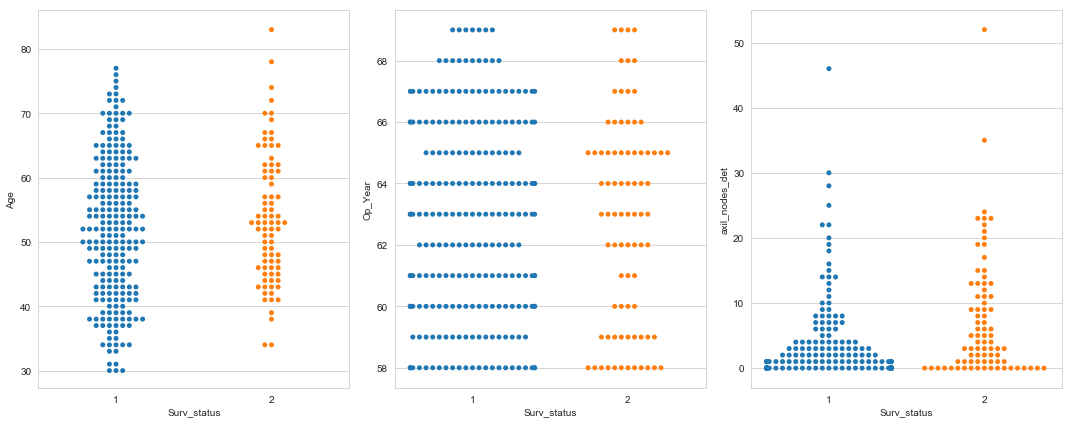

In [9]:
def swarmplot(features):
    fig,ax = plt.subplots(1,3,figsize=(15,6))
    for i,colm in enumerate(features):
        sns.swarmplot(x='Surv_status',y=colm, data= haberman, ax=ax[i])
    fig.tight_layout()

swarmplot(features)    

Using Swarm plot, we cannot find any new conclusions. 

# Violin Plot

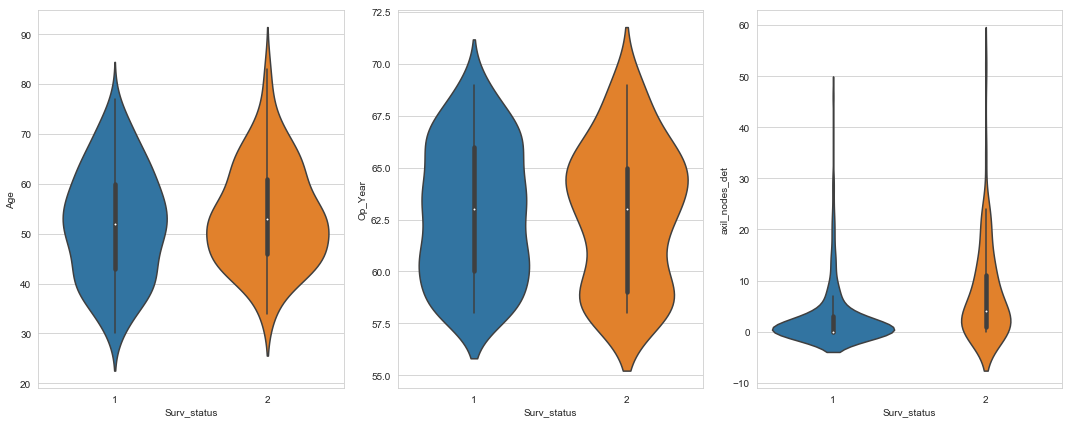

In [10]:
def violinplot(features):
    fig,ax = plt.subplots(1,3,figsize=(15,6))
    for i, colm in enumerate(features):
        sns.violinplot(x='Surv_status',y=colm, data= haberman,ax=ax[i])
    fig.tight_layout()

violinplot(features)    

Using Violin plot, we cannot come to any new conclusion about the data.

# Bivariate

# Pair Plot

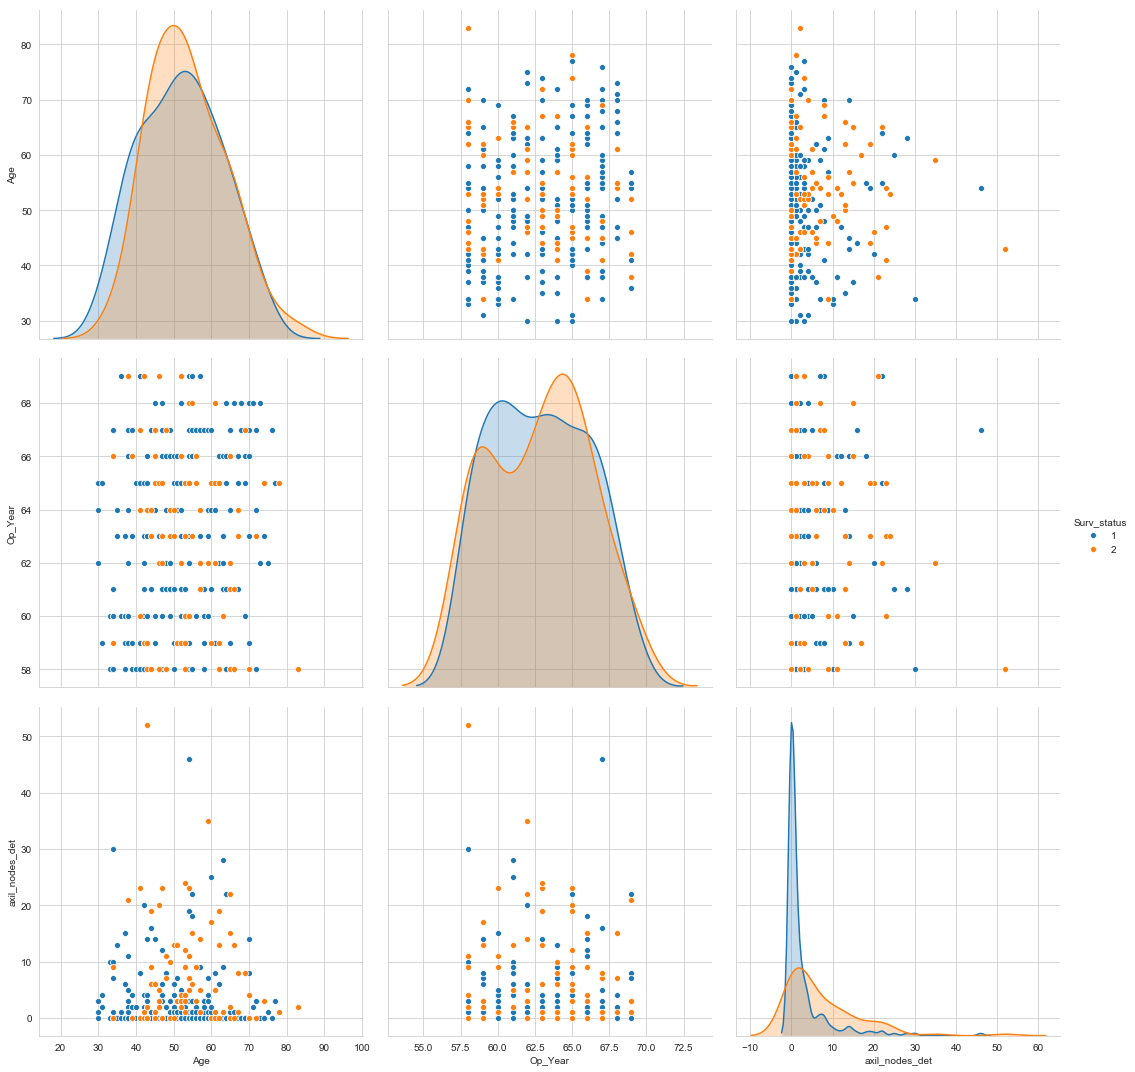

In [12]:
def pairplot(features):
    sns.pairplot(haberman, hue="Surv_status",vars = features, size=5);
    plt.show()
    
pairplot(features)


Here also we do not have any distinct conclusion and hence, we are not able to visualise the data clearly with definite conclusions.